In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Read in data and display first 5 rows
features_btc = pd.read_csv('../Data/btc_dataset.csv', parse_dates=['date'], index_col='date')
features_btc = features_btc.drop(columns=['Unnamed: 0'])
features_btc = features_btc.dropna()

features_eth = pd.read_csv('../Data/eth_dataset.csv', parse_dates=['date'], index_col='date')
features_eth = features_eth.drop(columns=['Unnamed: 0'])
features_eth = features_eth.dropna()

features_btc.head()

,PriceUSD,tw_polarity,tw_subjectivity,news_polarity,FeeMeanUSD,RevUSD,RevHashUSD,HashRate,DiffMean,SplyAdrTop10Pct,BlkSizeMeanByte,BlkCnt,TxCnt,AdrActCnt,FlowInExUSD,FlowOutExUSD,IssContUSD,NDF,ROI1yr,ROI30d,SplyCur,SER,TxTfrValAdjUSD,Volume,VtyDayRet30d,year,month,day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,61092.09506,0.096517,0.196215,1.080455,3.107144,57409115.37,0.000004,159350397.4,2.165930e+13,18677521.87,1304558.980,148,289324,1053426,1.017629e+09,8.638163e+08,56510187.93,0.347936,344.729871,27.827950,18860962.54,0.081517,16478311104,1488.557124,0.030561,2021,11,1
2021-11-02,63024.74723,-0.012462,0.179953,0.283333,3.706485,63352314.28,0.000004,170117315.4,2.165930e+13,18678638.01,1244660.639,158,300911,1035030,1.409387e+09,1.695444e+09,62236937.89,0.348206,363.568438,30.749622,18861950.04,0.081534,22789135920,1791.903727,0.030847,2021,11,2
2021-11-03,62955.98176,-0.002867,0.133529,0.415556,3.558272,64384559.60,0.000004,173347392.0,2.165930e+13,18679218.11,1189601.410,161,290879,1069212,1.523748e+09,1.585706e+09,63349456.65,0.347774,349.784685,27.729552,18862956.29,0.081592,19501090889,1448.486915,0.030794,2021,11,3
2021-11-04,61393.88998,-0.061765,0.248039,0.868182,3.389557,55840378.07,0.000004,153966938.3,2.165930e+13,18680175.56,1291185.748,143,286047,998917,9.977136e+08,1.324342e+09,54870789.17,0.347776,334.519400,19.077216,18863850.04,0.081625,17542780286,1036.528464,0.030561,2021,11,4
2021-11-05,61005.84083,0.092555,0.211510,0.150000,3.762230,60161987.38,0.000004,166887240.3,2.165930e+13,18681167.31,1242978.606,155,282446,1037437,9.409208e+08,1.077665e+09,59099408.31,0.348194,290.901038,10.079503,18864818.79,0.081567,18041049121,1043.914728,0.027926,2021,11,5


In [ ]:
#shift price by three days
features_btc['PriceUSD_week']=features_btc['PriceUSD'].shift(-7)
features_eth['PriceUSD_week']=features_eth['PriceUSD'].shift(-7)

# Split the data into training and testing sets
y_BTC = features_btc.dropna()['PriceUSD_week']
X_BTC  = features_btc.dropna().drop(columns=['PriceUSD', 'PriceUSD_week'])
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
X_forecast_BTC =  features_btc.tail(7).drop(['PriceUSD', 'PriceUSD_week'], axis=1)

y_ETH = features_eth.dropna()['PriceUSD_week']
X_ETH  = features_btc.dropna().drop(columns=['PriceUSD', 'PriceUSD_week'])
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2, random_state=43)
X_forecast_ETH =  features_eth.tail(7).drop(['PriceUSD', 'PriceUSD_week'], axis=1)

In [ ]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5)
    }

    for name, clf in models.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print(f'EVS: {explained_variance_score(y_test, clf.predict(X_test)):.2f}') 
        print()

In [ ]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

Bitcoin (BTC):
Random Forest Regressor
R2: 0.89
MAE: 1768.94
MSE: 4269188.24
EVS: 0.89

Gradient Boosting Regressor
R2: 0.89
MAE: 1441.38
MSE: 4179739.45
EVS: 0.89

ExtraTrees Regressor
R2: 0.91
MAE: 1528.27
MSE: 3425866.67
EVS: 0.91



In [ ]:
# Ethereum (ETH)
print('Ethereum (ETH):')
regression(X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH)

Ethereum (ETH):
Random Forest Regressor
R2: 0.26
MAE: 177.03
MSE: 42314.22
EVS: 0.52

Gradient Boosting Regressor
R2: 0.14
MAE: 192.73
MSE: 49472.93
EVS: 0.40

ExtraTrees Regressor
R2: 0.22
MAE: 178.92
MSE: 44990.30
EVS: 0.55



In [ ]:
# define prediction function
def prediction(name, X, y, X_forecast):
  models = {
      'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
      'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
      'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5)
  }

  # get predictions for each model
  targets = []
  for name, clf in models.items():
    clf.fit(X, y)
    targets.append(clf.predict(X_forecast))
  print(targets)
  #average predictions
  final_targets = []
  for i in range(len(targets[0])):
    sum = 0
    c = 0
    for target in targets:
      sum+=target[i]
      c+=1
    final_targets.append(sum/c)

  return final_targets

In [ ]:
# calculate forecasted prices for next 3 days
forecasted_BTC = prediction('BTC', X_BTC, y_BTC, X_forecast_BTC)
forecasted_ETH = prediction('ETH', X_ETH, y_ETH, X_forecast_ETH)
print(forecasted_ETH)

[array([49464.1701023 , 50175.3826096 , 49711.69603915, 49048.5794645 ,
       49430.8055312 , 49946.57423015, 50261.40611825]), array([49685.21266076, 50217.93047034, 50103.30532694, 48866.07987818,
       49561.29783063, 50254.28068067, 50975.57335969]), array([49431.19881544, 50412.83778432, 49754.92952148, 49262.86708191,
       49928.11356143, 50453.53043245, 51221.03238176])]
[array([4238.12857399, 4219.26743675, 4195.97999258, 4146.09263156,
       4160.04347577, 4157.22381684, 4157.11338307]), array([4172.73014755, 4131.89403403, 4134.38311   , 4080.10895449,
       4068.3424221 , 4130.45496975, 4147.65597505]), array([4220.05876751, 4206.23415834, 4195.71908866, 4191.71099658,
       4174.43792159, 4189.95093819, 4191.02673099])]
[4210.305829683096, 4185.798543040721, 4175.360730414337, 4139.304194210122, 4134.274606485866, 4159.209908260647, 4165.265363036996]


In [ ]:
# define index for next 7 days
last_date=features_btc.iloc[-1].name
print(last_date)
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date,periods=7,freq='D')
print(new_date)
# assign prediction to newly defined index
forecasted_BTC = pd.DataFrame(forecasted_BTC, columns=['PriceUSD'], index=new_date)
forecasted_ETH = pd.DataFrame(forecasted_ETH, columns=['PriceUSD'], index=new_date)

# combine historical price and predicted price
bitcoin = pd.concat([features_btc[['PriceUSD']], forecasted_BTC])
ethereum = pd.concat([features_eth[['PriceUSD']], forecasted_ETH])

# get actual price
btc_price = pd.read_csv('btc_price.csv', parse_dates=['date'], index_col='date')
eth_price = pd.read_csv('eth_price.csv', parse_dates=['date'], index_col='date')

2021-12-12 00:00:00
DatetimeIndex(['2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19'],
              dtype='datetime64[ns]', freq='D')


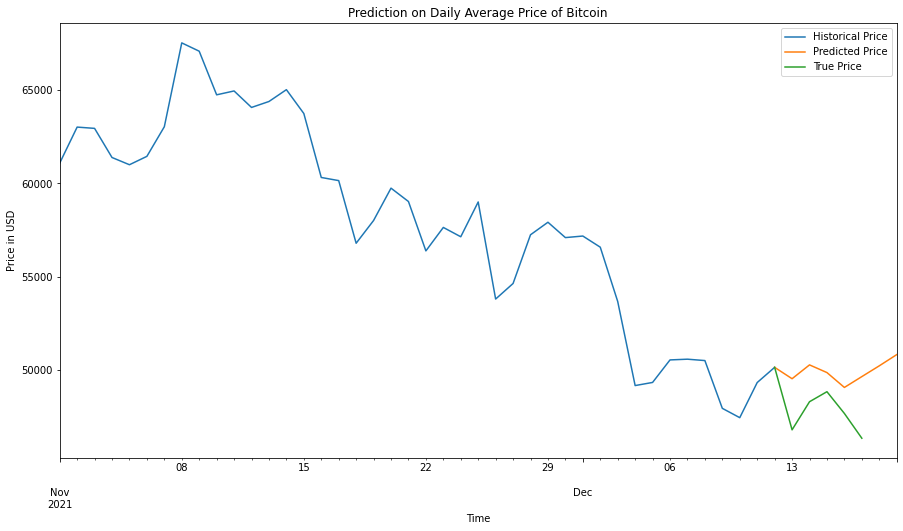

In [ ]:
plt.figure(figsize=(15,8))
(bitcoin[:-7]['PriceUSD']).plot(label='Historical Price')
(bitcoin[-8:]['PriceUSD']).plot(label='Predicted Price')
(btc_price[-6:]['PriceUSD']).plot(label='True Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

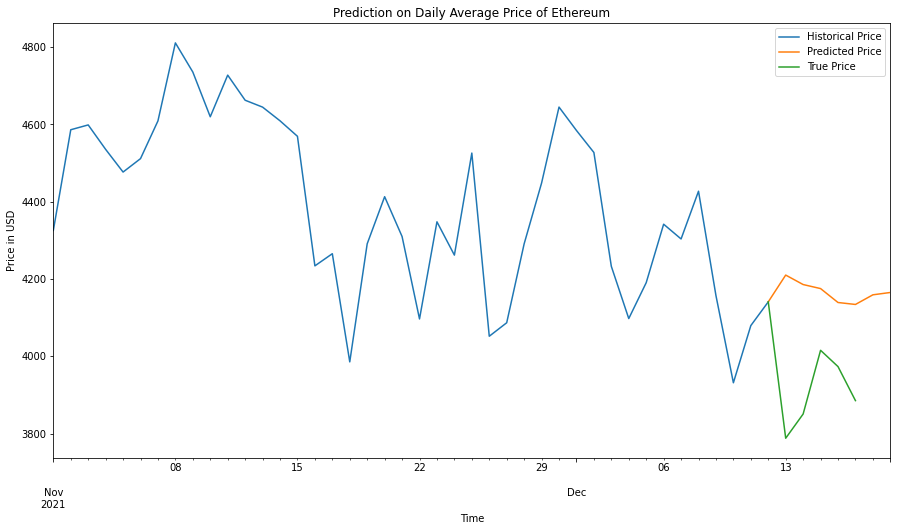

In [ ]:
plt.figure(figsize=(15,8))
(ethereum[:-7]['PriceUSD']).plot(label='Historical Price')
(ethereum[-8:]['PriceUSD']).plot(label='Predicted Price')
(eth_price[-6:]['PriceUSD']).plot(label='True Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Ethereum')
plt.legend()
plt.show()